# Введение в  API


План занятия:
1. API, HTTP, библиотека request
2. Практика с простыми API
3. Получим токен от VK API
4. Получим статистику по пабликам и пользователям vk
5. Соберем данные из новостной ленты

Спикер: Андрей Рысистов

Контакты(телеграм): @Rysistov

## **API, HTTP, библиотека requests**

В чем минусы стандартного **парсинга сайтов**:

    Довольно нудная и трудоемкая задача
    При смене дизайна или структуры сайта программа ломается и ее приходится переписывать
    
Наше счастье состоит в том, что крупные сайты предоставляют нам свою информацию в виде так называемых API. Давайте разберемся, что это за зверь

### API

**API (Application Programming Interface) или интерфейс для программирования приложений** - интерфейс, который позволяет разработчикам использовать готовые блоки для построения приложения.

Сторонние общедоступные API чаще всего отдают данные в одном из двух форматов: XML или JSON. 

**Вопрос:** Какие API знакомы вам?

### Протокол HTTP

Протокол HTTP - протокол прикладного уровня модели OSI, является самым широко распространенным протоколом. Все сайты в Internet работают на основе этого протокола. Изначально протокол был разработан для передачи HTML страниц, но позже стал использоваться и для других целей, например для организации микросервисного соединения.

HTTP - протокол, работающий по принципу клиент-сервер. Это означает, что во взаимодействии участвуют две составляющие программы - клиентская и серверная.

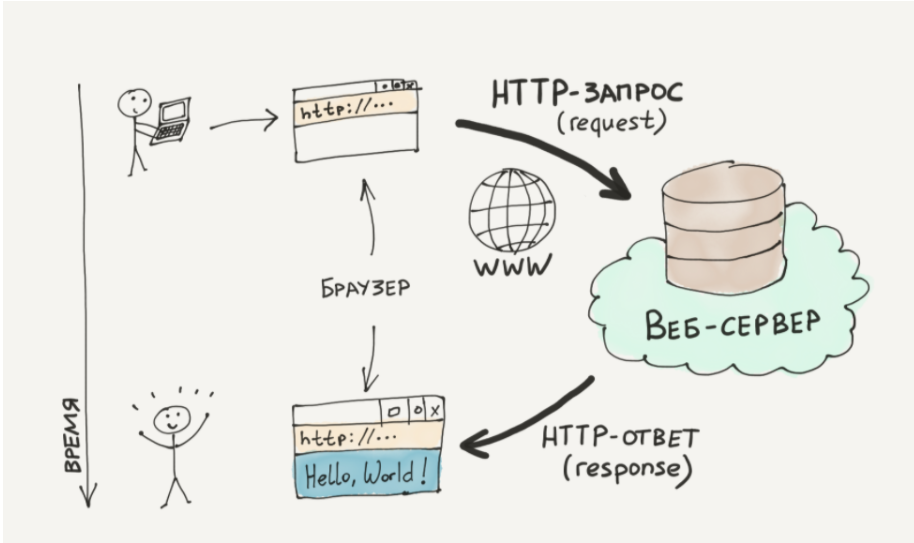

Основные HTTP методы:

    GET - получение содержимого ресурса
    POST - передача данных ресурсу
    PUT - обновление ресурса
    DELETE - удаление ресурса


**Вопрос**: Приведите примеры ситуаций из жизни, когда мы делаем GET и POST запросы

### Библиотека request

В качестве библиотеки, реализующий HTTP запросы будем использовать классическую библиотеку requests

**Requests** — это библиотека, которую вы можете использовать для отправки всех видов HTTP-запросов. У нее много функций, начиная от передачи параметров в URL-адресах до отправки пользовательских заголовков.

In [3]:
import requests
from pprint import pprint

rc = requests.get('https://vk.com')
print('Status code: ', rc.status_code)
pprint(rc.text[:1000])

Status code:  200
('            <!DOCTYPE html>\n'
 '      <html lang="ru" class="vk vk_js_no vk_1x vk_flex_no r d h  '
 'vk_appAuth_no n vk_old  vk_schemes_no   ">\n'
 '      <head>\n'
 '              <meta charset="utf-8">\n'
 '        <meta name="viewport" content="width=device-width, '
 'initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, minimal-ui, '
 'user-scalable=no" />\n'
 '        <meta name="format-detection" content="telephone=no" />\n'
 '        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n'
 '        <meta name="MobileOptimized" content="176" />\n'
 '        <meta name="HandheldFriendly" content="True" />\n'
 '        <base id="base">\n'
 '        \n'
 '        <meta name="description" content="ВКонтакте – универсальное средство '
 'для общения и поиска друзей и одноклассников, которым ежедневно пользуются '
 'десятки миллионов человек. Мы хотим, чтобы друзья, однокурсники, '
 'одноклассники, соседи и коллеги всегда оставались в контакте." />\n'
 '      

**Вопрос:** 
    1. Какой формат данных мы получили с помощью запроса get?
    2. Как перевести наш ответ в формат JSON?


**Дополнительная информация:**

Про модель OSI: https://wiki.merionet.ru/seti/18/model-osi-eto-prosto/

Про HTTP: https://javarush.ru/groups/posts/2521-chastjh-3-protokolih-httphttps

Про HTTP-методы: https://developer.mozilla.org/ru/docs/Web/HTTP/Methods

Документация к requests: https://requests.readthedocs.io/en/master/user/quickstart/

Примеры интересных API:
- api карт Яндекс, Google, OpenStreetMap
- api погоды
 https://habr.com/ru/post/315264/ 
- api википедии
 pip3 install wikipedia-api
- OMDb API - поиск фильмов по рейтингу и жанру
 http://www.omdbapi.com/

## Практика с простыми API

In [4]:
# библиотека geocoder поможет нам получить координаты по географическому названию
# !pip install geocoder

In [5]:
import geocoder
import requests
import pandas as pd

In [6]:
city = input('Enter your city name: ')#используйте свой город
g = geocoder.arcgis(city) #получаем данные о географических координатах города
#print(g.json)
lat, lng = g.json['lat'], g.json['lng']
obj = str(lat) + ' ' + str(lng)
print('City coordinates {0}: {1}'.format(city, obj))

City coordinates саратов: 51.53182000000004 46.01042000000007


In [7]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
# используйем API sunrise-sunset для получения времени восхода и заката
# https://sunrise-sunset.org/api
api_URL = 'https://api.sunrise-sunset.org/json'
params = {
    'lat': lat,
    'lng': lng,
    'date': 'today'
}

# requests за нас формирует конечный URL из параметров
response = requests.get(api_URL, params=params)
pprint(response.text)

SSLError: HTTPSConnectionPool(host='api.sunrise-sunset.org', port=443): Max retries exceeded with url: /json?lat=51.53182000000004&lng=46.01042000000007&date=today (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')))

Мы получили строку в формате JSON. Её можно преобразовать в словарь методом json и после этого обращаться к различным полям.

In [ ]:
response_dict = response.json()
response_dict

{'results': {'sunrise': '2:19:57 AM',
  'sunset': '4:38:26 PM',
  'solar_noon': '9:29:11 AM',
  'day_length': '14:18:29',
  'civil_twilight_begin': '1:39:43 AM',
  'civil_twilight_end': '5:18:39 PM',
  'nautical_twilight_begin': '12:48:05 AM',
  'nautical_twilight_end': '6:10:18 PM',
  'astronomical_twilight_begin': '11:45:07 PM',
  'astronomical_twilight_end': '7:13:15 PM'},
 'status': 'OK'}

In [ ]:
#создадим DataFrame
pd.DataFrame([response.json()['results']])

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end
0,2:19:57 AM,4:38:26 PM,9:29:11 AM,14:18:29,1:39:43 AM,5:18:39 PM,12:48:05 AM,6:10:18 PM,11:45:07 PM,7:13:15 PM


## Получение токена VK API


API ВКонтакте — это интерфейс, который позволяет получать информацию из базы данных vk.com и производить **регламентированные** действия на сервисе с помощью http-запросов к специальному серверу.

Синтаксис запросов и тип возвращаемых ими данных строго определены на стороне самого сервиса. 


**Токены** — это ключи доступа к API. Они используются для авторизации при запросах к API.

Алгоритм:

1) Переходим по ссылке https://vk.com/dev/

2) Заходим в "Мои приложения"

3) Нажимаете на кнопку создать приложение

4) Выбираете standalone приложение, указываете название приложения

5) Переходите в настройки, включаете Open API

6) В поле *адрес сайта* вводите http://localhost

7) В поле базовый домен вводите localhost

![](https://sun9-4.userapi.com/c857736/v857736671/14acee/6qdLYkpdBl4.jpg)

8) Сохраняете изменения

9) Копируете id приложения 

10) В ссылку 

https://oauth.vk.com/authorize?client_id=1&display=page&scope=stats,offline&response_type=token&v=5.103&state=123456



вместо 1 вставьте id **вашего** приложения

9) Нажимаете разрешить

10) Сохраняете токен в файл 'token.txt'

![](https://sun9-29.userapi.com/c857736/v857736671/14acf8/2c-F9g7w0jA.jpg)

**Методы**
https://vk.com/dev.php?method=first_guide

**Версии** 
https://vk.com/dev/versions

**Об ограничениях**
https://vk.com/dev/api_requests?f=3.%20%D0%9E%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B8%20%D1%80%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%86%D0%B8%D0%B8

In [ ]:
# читаем токен
with open('token.txt', 'r') as file_object:
    token = file_object.read().strip()

Получим информацию о пользователе при помощи метода [users.get](https://vk.com/dev/users.get)

In [ ]:
#Получим информацию по пользователю с id 1
URL = 'https://api.vk.com/method/{}'
method = 'users.get'
params = {
    'user_id': '1',
    'access_token': token, # токен и версия api являются обязательными параметрами во всех запросах к vk
    'v':'5.131'
}
res = requests.get(URL.format(method), params=params)
res.json()

{'response': [{'id': 1,
   'first_name': 'Павел',
   'last_name': 'Дуров',
   'can_access_closed': True,
   'is_closed': False}]}

Вопрос: что за пользователь скрывается под id 32707600

In [ ]:
#Получим информацию по официальной группе ВКонтакте
URL = 'https://api.vk.com/method/{}'
method = 'groups.getById'
params = {
    'group_ids': 'vk',
    'access_token': token,
    'fields': 'activity,description,contacts,members_count',
    'v':'5.131'
}
res = requests.get(URL.format(method), params=params)
result = res.json()['response']
result

[{'id': 22822305,
  'name': 'ВКонтакте',
  'screen_name': 'vk',
  'is_closed': 0,
  'type': 'page',
  'photo_50': 'https://sun1-54.userapi.com/s/v1/ig2/uFo7zkZuLXOp2EQJmR5fNEuDjX7T2hCeC5xyN3LXJNeDSPd7-A_dKV3pJ1g1Evo1b0VKgVFqLutdbBy4Hq_Qv8Je.jpg?size=50x50&quality=95&crop=0,0,1000,1000&ava=1',
  'photo_100': 'https://sun1-54.userapi.com/s/v1/ig2/6MtgoyFShLLi1KlWvbtGlO8C6QGQ2FqhDUr12aq20pzFiWTFjCSzXUzm6zI2ghfXb9O-AnDoZmZ8ZRUQGbNvzBoR.jpg?size=100x100&quality=95&crop=0,0,1000,1000&ava=1',
  'photo_200': 'https://sun1-54.userapi.com/s/v1/ig2/dux6ODl0sQJ0FzC9PFwPhGmj8oCmqVf6XC2kbVqqeJTigYa4wYMGudRxuoSFMG3jmhnw9ip5yrrNFR8ctXZ8I1Pb.jpg?size=200x200&quality=95&crop=0,0,1000,1000&ava=1',
  'description': 'Это главное сообщество Команды ВКонтакте. Здесь Вы можете узнать обо всех новостях из первых рук.',
  'members_count': 12499771,
  'activity': 'ВКонтакте',
  'contacts': [{'user_id': 92933, 'desc': 'CEO ВКонтакте'},
   {'user_id': 6492, 'desc': 'Вице-президент VK по социальным платформам'},
  

## Получение информации по пользователям и пабликам

Напишем функцию, которая будет находить группы по поисковому запросу при помощи метода [groups.search](https://vk.com/dev/groups.search)

**Задание:** обратитесь к документации groups.search и посмотрите, какие параметры в функции **groups_search_query** нам надо указать, чтобы получить информацию по 100 группам типа 'group', в названии которых есть в ключевого слово (key_word) с сортировкой отношению дневной посещаемости к количеству пользователей

In [22]:
# читаем токен, предварительно записанный в файл token.txt, файл положить рядом с ноутбуком
with open('token.txt', 'r') as file_object:
    token = file_object.read().strip()
URL = 'https://api.vk.com/method/{}'
def groups_search_query(key_word, token, sorting=0, type_group='group', count=500 ):
    params = {
        'q': key_word,
        'access_token': token,
        'sort': sorting,
        'count': count,
        'type': type_group,
        'v':'5.131'
    }
    res = requests.get(URL.format('groups.search'), params).json()
    result = res['response']['items']
    return result
key_word = 'авто'
groups_search_df =pd.DataFrame(groups_search_query(key_word, token, count=1000, sorting=2, type_group='group'))
groups_search_df.tail()

,id,name,screen_name,is_closed,type,photo_50,photo_100,photo_200
995,126928726,Авто мир,club126928726,0,group,https://sun1-89.userapi.com/s/v1/if1/AL5zNfdex...,https://sun1-89.userapi.com/s/v1/if1/h9sjgGPMS...,https://sun1-89.userapi.com/s/v1/if1/7vgeRVHKj...
996,16261078,любители АВТО,club16261078,0,group,https://sun9-12.userapi.com/c9282/g16261078/c_...,https://sun9-12.userapi.com/c9282/g16261078/b_...,https://sun9-12.userapi.com/c9282/g16261078/b_...
997,87746710,Авто запчасти,club87746710,0,group,https://sun1-47.userapi.com/s/v1/if1/cTH3YQ4WA...,https://sun1-47.userapi.com/s/v1/if1/_hBSnxzMJ...,https://sun1-47.userapi.com/s/v1/if1/wrFB5ehZz...
998,10946750,АВТО+,club10946750,0,group,https://sun9-81.userapi.com/c4332/g10946750/c_...,https://sun9-81.userapi.com/c4332/g10946750/b_...,https://sun9-81.userapi.com/c4332/g10946750/b_...
999,18039582,БЫСТРЫЕ АВТО,club18039582,0,group,https://sun9-29.userapi.com/c9540/g18039582/c_...,https://sun9-29.userapi.com/c9540/g18039582/b_...,https://sun9-29.userapi.com/c9540/g18039582/b_...


Получим расширенную информацию по группам при помощи метода [groups.getById](https://vk.com/dev/groups.getById)

**Задание**: посмотрите в документации по методу groups.getById какие значения параметра fields нам надо указать, чтобы вывести описание сообщества, активность в нем и количество подписчиков

In [17]:
URL = 'https://api.vk.com/method/{}'
def group_ids_query(token, fields='members_count'):
    # преобразуем список всех id в строку (в таком виде принимает данные параметр fields)
    groups_ids = ','.join(str(x) for x in groups_search_df.id)
    params = {
        'access_token': token,
        'v':'5.131',
        'group_ids': groups_ids,
        'fields':  fields

    }
    result = requests.get(URL.format('groups.getById'), params)
    return result.json()['response']

group_ids_df = pd.DataFrame(group_ids_query(token, 'city,country,members_count,description,activity'))
group_ids_df.sort_values('members_count', ascending=False).head(5)

,id,name,screen_name,is_closed,type,photo_50,photo_100,photo_200,city,country,description,members_count,activity
1,25297429,Computer Science Center,compscicenter,0,group,https://sun1-22.userapi.com/s/v1/ig2/BzzOo2bMK...,https://sun1-22.userapi.com/s/v1/ig2/n4I_qF28q...,https://sun1-22.userapi.com/s/v1/ig2/Eh9S2sfSR...,NaN,"{'id': 1, 'title': 'Россия'}",Computer Science Center – образовательный прое...,17532,Открытая группа
119,67264808,IT-Academy | Минск,park_itacademy,0,group,https://sun1-24.userapi.com/s/v1/ig2/XF7kDsw9B...,https://sun1-24.userapi.com/s/v1/ig2/7dTl869Nw...,https://sun1-24.userapi.com/s/v1/ig2/4hNiYpkvq...,"{'id': 282, 'title': 'Минск'}","{'id': 3, 'title': 'Беларусь'}",Образовательный центр программирования и высок...,7237,Открытая группа
29,67344545,«Перфокарта» | Журнал про Data Science и SMM.,perfokarta_magazine,0,group,https://sun1-47.userapi.com/s/v1/if1/rWUtwQHDI...,https://sun1-47.userapi.com/s/v1/if1/kmklgIKlk...,https://sun1-47.userapi.com/s/v1/if1/zEB07bG_Z...,NaN,NaN,,6378,Открытая группа
131,46119452,Level UP. Школа IT-профессий,levelspb,0,group,https://sun1-84.userapi.com/s/v1/if1/sntHeypVj...,https://sun1-84.userapi.com/s/v1/if1/XficggCqv...,https://sun1-84.userapi.com/s/v1/if1/MjIM4j6lE...,"{'id': 2, 'title': 'Санкт-Петербург'}","{'id': 1, 'title': 'Россия'}",Level UP - это школа IT-профессий. \n\n - Помо...,2845,Открытая группа
142,87252699,IT-события ЦФТ,itevents_cft,0,group,https://sun1-17.userapi.com/s/v1/ig2/6OIywBR5Y...,https://sun1-17.userapi.com/s/v1/ig2/Z2f174QSJ...,https://sun1-17.userapi.com/s/v1/ig2/M4z6wob0u...,"{'id': 99, 'title': 'Новосибирск'}","{'id': 1, 'title': 'Россия'}","Мы делаем крутые IT-события в Новосибирске, Са...",2824,Открытая группа


**Вопрос:** как найти в данном DataFrame группу Molecular Science?

In [16]:
group_ids_df[group_ids_df.name == 'Data science 2020']

,id,name,screen_name,is_closed,type,photo_50,photo_100,photo_200,city,country,description,members_count,activity


Получим всех пользователей группы при помощи метода [groups.getMembers](https://vk.com/dev/groups.getMembers)

In [19]:
import numpy as np
URL = 'https://api.vk.com/method/{}'
params = {
    'access_token': token,
    'v':'5.131',
    'group_id': 25297429,
    'fields': 'city,sex'
}

req = requests.get(URL.format('groups.getMembers'), params)
# req.json()

get_members_df = pd.DataFrame(req.json()['response']['items']).head()
get_members_df.sort_values('sex', ascending=False).head(5)

,id,first_name,last_name,can_access_closed,is_closed,sex,city
1,271,Александр,Селиванов,False,True,2,"{'id': 2, 'title': 'Санкт-Петербург'}"
3,620,Юрий,Баскаков,False,True,2,"{'id': 2, 'title': 'Санкт-Петербург'}"
0,254,Ася,Щёголь,True,False,1,NaN
2,486,Наталия,Юрасова,False,True,1,"{'id': 2, 'title': 'Санкт-Петербург'}"
4,638,Мария,Аспен,True,False,1,NaN


**Задание:** определите процентное соотношение мужчин(sex=2) и женщин(sex=1) в данном паблике

Напишем программу, которая будет искать посты в новостной ленте по указанным запросам при помощи [newsfeed.search](https://vk.com/dev/newsfeed.search)

In [ ]:
import time
pd.set_option('max_colwidth', None)

def get_newsfeed_posts(url, tag):
    newsfeed_df = pd.DataFrame()
    params = {
        'access_token': token,
        'v':'5.131',
        'q': tag,
        'start_from': '',
        'count': 200,
        'extended': 1
    }    
    while True:
        result = requests.get(url, params)
        time.sleep(0.33)
        newsfeed_df = pd.concat([newsfeed_df, pd.DataFrame(result.json()['response']['items'])])
        if 'next_from' in result.json()['response'].keys():
            params['start_from'] = result.json()['response']['next_from']
        else:
            break
    return newsfeed_df


def main_vk_newsfeed():
    print('Собираем данные из новостной ленты ВК')
    tag_list = ['skillfactory']
    url = 'https://api.vk.com/method/newsfeed.search'
    df = pd.DataFrame()
    for tag in tag_list:
        df = pd.concat([df, get_newsfeed_posts(url, tag)])
    print('Собрали данные из новостной ленты ВК')
    return df

main_vk_newsfeed().head()

Собираем данные из новостной ленты ВК
Собрали данные из новостной ленты ВК


,id,date,owner_id,from_id,post_type,text,marked_as_ads,attachments,post_source,comments,likes,reposts,views,signer_id,copy_history
0,731,1618560240,-182347889,-182347889,post,SkillFactory — Школа Data Science,0.0,"[{'type': 'link', 'link': {'url': 'https://clck.ru/UFN45', 'title': 'SkillFactory — Школа Data Science', 'caption': 'skillfactory.ru', 'description': 'Школа по работе с данными SkillFactory ★ SkillFactory: обучение Big Data, Data Science, Machine Learning, Data Engineering и AI ☎ +7 495 291-09-12', 'photo': {'album_id': -27, 'date': 1618243544, 'id': 457331043, 'owner_id': 2000010424, 'has_tags': False, 'sizes': [{'height': 480, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=1074x480&quality=96&sign=f9bae819519110b26b3fed3fe6e88653&c_uniq_tag=7GABO1wrlIWJM6pEY3dgsy4iyzef6uZCSkX2sxLabRY&type=share', 'type': 'k', 'width': 1074}, {'height': 240, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=537x240&quality=96&sign=5c3cbf5faa77f79e0dc33d95002ff954&c_uniq_tag=j1qrzEPSb7wUgIjo_cfJJbxyHUPTLPYU7Z_JJSXReK8&type=share', 'type': 'l', 'width': 537}, {'height': 73, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=130x80&quality=96&crop=147,0,780,480&sign=a748ad854b7a8a5e575a953230ab1700&c_uniq_tag=35gjnys6ZMoROG2S0YY7hHn3p9hakWuOlQ3IiSZqUVM&type=share', 'type': 'm', 'width': 130}, {'height': 146, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=260x140&quality=96&crop=91,0,891,480&sign=af8afc5f915f21f75d973f85ae2c45c8&c_uniq_tag=Hz9EHwhL3-oMHGuyXlRV2pJHjUpkvR148imrbC1KEX8&type=share', 'type': 'p', 'width': 260}, {'height': 42, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=75x35&quality=96&crop=22,0,1029,480&sign=3adfc7306ad4e22548333716bff3c21e&c_uniq_tag=no9CBwjcVyqidfdfY_l89GcCPPdeZbGx7g0IfyEGpSk&type=share', 'type': 's', 'width': 75}, {'height': 84, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=150x80&quality=96&crop=87,0,900,480&sign=67f56efc1562a20f276030972ce63099&c_uniq_tag=Tdr5c8Ku1jsf6xbXgI_XTYciqngHrJIKC600GyV5u5A&type=share', 'type': 'x', 'width': 150}], 'text': '', 'user_id': 100}}}]",{'type': 'vk'},"{'count': 0, 'can_post': 1, 'groups_can_post': True}","{'count': 0, 'user_likes': 0, 'can_like': 1, 'can_publish': 1}","{'count': 0, 'user_reposted': 0}",{'count': 3},NaN,NaN
1,730,1618556640,-182347889,-182347889,post,SkillFactory — Школа Data Science,0.0,"[{'type': 'link', 'link': {'url': 'https://clck.ru/UFN45', 'title': 'SkillFactory — Школа Data Science', 'caption': 'skillfactory.ru', 'description': 'Школа по работе с данными SkillFactory ★ SkillFactory: обучение Big Data, Data Science, Machine Learning, Data Engineering и AI ☎ +7 495 291-09-12', 'photo': {'album_id': -25, 'date': 1618243532, 'id': 457340236, 'owner_id': 2000010008, 'has_tags': False, 'sizes': [{'height': 480, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=1074x480&quality=96&sign=f9bae819519110b26b3fed3fe6e88653&c_uniq_tag=7GABO1wrlIWJM6pEY3dgsy4iyzef6uZCSkX2sxLabRY&type=share', 'type': 'k', 'width': 1074}, {'height': 240, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=537x240&quality=96&sign=5c3cbf5faa77f79e0dc33d95002ff954&c_uniq_tag=j1qrzEPSb7wUgIjo_cfJJbxyHUPTLPYU7Z_JJSXReK8&type=share', 'type': 'l', 'width': 537}, {'height': 73, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=130x80&quality=96&crop=147,0,780,480&sign=a748ad854b7a8a5e575a953230ab1700&c_uniq_tag=35gjnys6ZMoROG2S0YY7hHn3p9hakWuOlQ3IiSZqUVM&type=share', 'type': 'm', 'width': 130}, {'height': 146, 'url': 'https://sun9-2.userapi.com/impg/BmsqKu-eHPn4JvPi6jSEw_qpIUCEKNRlft4oYw/s3wQTHB6qCc.jpg?size=260x140&quality=96&cr

### Спасибо за внимание буду рад ответить на ваши вопросы!
Ссылка на форму ОС:
https://forms.gle/TAeFKkTMpJCT5zc88